In [1]:
import catboost
import sklearn
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Generate toy data

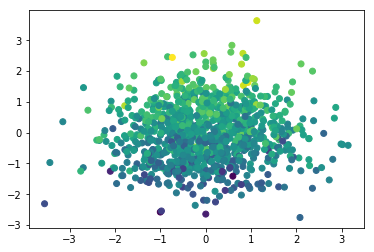

In [3]:
n_features = 3
X, y = make_regression(n_samples=1000, n_features=10, n_informative=n_features)
plt.scatter(X[:, 0], X[:, 1], c=y)
X = pd.DataFrame(X)
X.columns = ['Column_{}'.format(i) for i in range(X.shape[1])]

cat_values_1 = ['A', 'B', 'C']
cat_values_2 = ['some', 'random', 'categorical', 'feature', 'values', 'testing']
X.loc[:, 'CatColumn_1'] = [cat_values_1[np.random.randint(0, len(cat_values_1))] for _ in range(X.shape[0])]
X.loc[:, 'CatColumn_2'] = [cat_values_2[np.random.randint(0, len(cat_values_2))] for _ in range(X.shape[0])]

In [4]:
X.sample(3)

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,CatColumn_1,CatColumn_2
24,0.776196,0.740419,-0.213584,0.365852,0.972531,0.019940,-0.101997,1.318236,-0.574410,0.534950,C,values
849,2.006797,0.124124,0.902244,-0.035213,-1.995222,-0.029038,2.643630,-0.431299,0.419398,0.790747,B,values
854,1.547870,0.085581,0.065335,-0.736253,0.064843,-2.345844,0.769682,-1.604981,0.137882,1.393045,A,categorical


### Train model and plot statistics

In [5]:
model = catboost.CatBoostRegressor(cat_features=['CatColumn_1', 'CatColumn_2'], 
                                   one_hot_max_size=300, iterations=500)
model.fit(X, y, silent=True)

#### Float feature

In [6]:
feature_num = 'Column_2'
res = model.get_binarized_statistics(X, y, feature_num, plot=True)

#### One-Hot feature

In [7]:
feature_num = 'CatColumn_2'
res = model.get_binarized_statistics(X, y, feature_num, cat_feature_values=cat_values_2, plot=True)

### Test on Epsilon dataset

In [8]:
import catboost
import sklearn
import numpy as np
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression, make_classification
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [10]:
eps_test = pd.read_csv('./epsilon/test.csv', nrows=10000)

In [11]:
eps_y_test = np.array(eps_test.iloc[:, 1]).astype(int)

In [12]:
eps_test.drop(['Unnamed: 0', '0'], axis=1, inplace=True)

In [13]:
eps_test.head(3)

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.005439,0.013331,-0.002186,-0.014590,0.015631,-0.032606,-0.004455,0.013611,0.024088,0.010940,...,0.029023,0.028153,-0.001714,-0.048453,-0.030330,-0.006301,-0.022238,-0.009459,0.027544,-0.026216
1,0.001442,0.033820,-0.048836,0.000652,-0.028718,0.013421,-0.006827,0.053082,-0.016931,0.049545,...,-0.016412,0.005543,-0.017588,0.005169,0.037386,-0.002207,0.023466,0.023459,0.036497,0.033899
2,0.004597,-0.042784,-0.004416,-0.005692,0.000731,-0.025873,0.031471,0.059522,0.003261,0.015846,...,-0.020841,-0.030902,0.005387,-0.017727,-0.011851,0.007834,-0.002806,-0.004059,0.024565,-0.001050


In [14]:
eps_model = catboost.CatBoost()
eps_model.load_model('./epsilon/epsilon8k_64.bin')

In [15]:
%%time
feature_num = 140
eps_res = eps_model.get_binarized_statistics(eps_test, eps_y_test, feature_num, 
                                             prediction_type='Probability', plot=False)

CPU times: user 4.78 s, sys: 38.3 ms, total: 4.82 s
Wall time: 4.82 s


In [16]:
eps_res['objects_per_bin'].sum() == len(eps_test)

True

In [17]:
catboost.core._plot_binarized_feature_statistics(eps_res, feature_num)

### Test on Titanic dataset

In [18]:
import catboost
import sklearn
import numpy as np
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression, make_classification
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [20]:
from catboost.datasets import titanic

In [21]:
titanic_train, titanic_test = titanic()

In [22]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
titanic_train_target = titanic_train.Survived
titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [24]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250
3,1,female,35.0,1,53.1000
4,3,male,35.0,0,8.0500


In [25]:
model = catboost.CatBoostClassifier(
    iterations=200, 
    cat_features=['Pclass', 'Sex', 'SibSp'], 
    one_hot_max_size=300)
model.fit(titanic_train, titanic_train_target, silent=True)

In [26]:
titanic_train.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Fare      float64
dtype: object

In [28]:
feature = 'Sex'
res = model.get_binarized_statistics(titanic_train, titanic_train_target, feature, 
                                     cat_feature_values=['male', 'female'], plot=True)